In [1]:
import turicreate as tc

In [2]:
train_data=tc.SFrame('image_train_data')
test_data=tc.SFrame('image_test_data')

In [3]:
knn_model=tc.nearest_neighbors.create(train_data,features=['deep_features'],label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [4]:
cat=train_data[18:19]

,SArray
0,

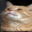

In [8]:
cat['image'].explore()

In [9]:
knn_model.query(cat)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 38.427ms     |

| Done         |         | 100         | 242.664ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,384,0.0,1
0,6910,36.94031379506751,2
0,39777,38.46348889747021,3
0,36870,39.75596231189652,4
0,41734,39.786601414815024,5


In [12]:
def get_images_ids(query_result):
    return train_data.filter_by(query_result['reference_label'],'id')

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 13.222ms     |

| Done         |         | 100         | 204.639ms    |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

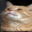
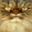
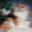
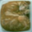
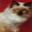

In [17]:
get_images_ids(knn_model.query(cat))['image'].explore()

In [28]:
show_neighbors =lambda i:get_images_ids(knn_model.query(train_data[i:i+1]))['image'].explore()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 14.365ms     |

| Done         |         | 100         | 190.524ms    |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

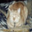
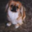
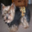
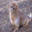
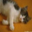

In [29]:
show_neighbors(1)

In [31]:
sketch = tc.Sketch(train_data['label'])

In [46]:
sketch


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+


In [59]:
dog=train_data.filter_by('dog','label')
cat=train_data.filter_by('cat','label')
bird=train_data.filter_by('bird','label')
automobile=train_data.filter_by('automobile','label')

In [81]:
dog_test=test_data.filter_by('dog','label')
cat_test=test_data.filter_by('cat','label')
bird_test=test_data.filter_by('bird','label')
automobile_test=test_data.filter_by('automobile','label')

In [62]:
cat_model=tc.nearest_neighbors.create(cat,features=['deep_features'],label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [63]:
dog_model=tc.nearest_neighbors.create(dog,features=['deep_features'],label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [64]:
bird_model=tc.nearest_neighbors.create(bird,features=['deep_features'],label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [65]:
automobile_model=tc.nearest_neighbors.create(automobile,features=['deep_features'],label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 12.439ms     |

| Done         |         | 100         | 69.659ms     |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

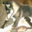
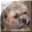
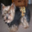
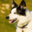
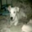

In [103]:
get_images_ids(dog_model.query(test_data[0:1]))['image'].explore()

In [67]:
cat_model.query(dog[0:1])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 15.23ms      |

| Done         |         | 100         | 67.132ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,41989,40.46011258793056,1
0,40249,40.94084807266222,2
0,42744,42.79764201650802,3
0,15595,42.974197395795,4
0,2738,43.137943167196966,5


In [68]:
cat_model.query(test_data[0:1])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 14.547ms     |

| Done         |         | 100         | 75.062ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,16289,34.62371920804245,1
0,45646,36.00687992842462,2
0,32139,36.52008134363789,3
0,25713,36.754850252057054,4
0,331,36.87312281675268,5


In [71]:
def mean_distance(q):
    return q['distance'].mean()

In [72]:
mean_distance(cat_model.query(test_data[0:1]))

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 14.592ms     |

| Done         |         | 100         | 82.982ms     |

+--------------+---------+-------------+--------------+

36.15573070978294

In [73]:
mean_distance(dog_model.query(test_data[0:1]))

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 17.359ms     |

37.77071136184156

| Done         |         | 100         | 68.959ms     |

+--------------+---------+-------------+--------------+

In [78]:
cat_model.query(dog[0:1],k=1)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 12.579ms     |

| Done         |         | 100         | 82.288ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,41989,40.46011258793056,1


In [84]:
new = tc.SFrame({'dog-dog':dog_model.query(dog_test)['distance'],'dog-cat': cat_model.query(dog_test)['distance'],'dog-bird':bird_model.query(dog_test)['distance'],'dog-automobile':automobile_model.query(dog_test)['distance']})

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 127000  | 24.9509     | 623.545ms    |

| Done         | 509000  | 100         | 675.562ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 128000  | 25.1473     | 614.486ms    |

| Done         | 509000  | 100         | 695.291ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 119000  | 24.8954     | 589.074ms    |

| Done         | 478000  | 100         | 626.306ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 127000  | 24.9509     | 604.08ms     |

| Done         | 509000  | 100         | 658.576ms    |

+--------------+---------+-------------+--------------+

In [85]:
new

dog-automobile,dog-bird,dog-cat,dog-dog
41.95797614571203,41.75386473035126,36.419607706754384,33.47735903726335
44.14373214153456,41.86658284356225,36.51516347744005,34.415221599022765
44.47761378698352,41.967965127552155,37.064258043761285,34.81386300614125
45.10424203606771,42.22667318207734,37.121772549165435,34.928931346762994
45.286528163960504,42.330722321998884,38.283714583643565,37.15464091935056
46.00213318067788,41.3382958924861,38.83532688735542,32.84584956840554
46.3466070394567,41.86271836184139,38.95886185782913,35.63795725175503
46.743666655399664,42.71269395355365,39.053535566145136,37.00424635846063
47.79929118249042,43.65886761576576,39.930191990811885,37.005163212466954
47.985709824421406,44.44544065202869,40.381155378357704,37.927903158721776


In [112]:
def is_dog_correct(row):
    if row['dog-dog'] > row['dog-cat']:
        if row['dog-dog'] > row['dog-bird']:
            if row['dog-dog'] > row['dog-automobile']:
                return 1
            else:
                return 0
        else:
            return 0
    else:
        return 0

In [113]:
sum(new.apply(is_dog_correct))

41

In [111]:
1319/5000

0.2638

In [105]:
dog_model

Class                          : NearestNeighborsModel

Attributes
----------
Method                         : brute_force
Number of distance components  : 1
Number of examples             : 509
Number of feature columns      : 1
Number of unpacked features    : 4096
Distance                       : euclidean
Total training time (seconds)  : 0.1567

In [107]:
dog_model=tc.nearest_neighbors.create(dog,features=['deep_features'],label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [108]:
dog_model.summary()

Class                          : NearestNeighborsModel

Attributes
----------
Method                         : brute_force
Number of distance components  : 1
Number of examples             : 509
Number of feature columns      : 1
Number of unpacked features    : 4096
Distance                       : euclidean
Total training time (seconds)  : 0.1481

